# Teoria dos Grafos


### Neste trabalho foi utilizada a linguagem Python 3.8.6 e as bibliotecas NetworkX e Osmnx para adquirir os dados de um bairro.
### Os dados servirão para formar um grafo gerado pela biblioteca construída durante o semestre.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.1'

## A biblioteca Osmnx, importada, modela e analisa dados do mapa do projeto OpenStreetMap, um projeto open source semelhante à Wikipedia.

## Serão importados os dados do bairro Presidente Altino, de Osasco-SP:

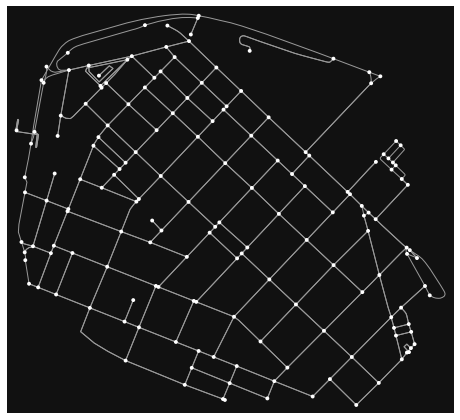

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
G = ox.graph_from_point((-23.5268,-46.7676), dist=650, network_type='all')
ox.plot_graph(G)

## Foi gerado um grafo pela biblioteca NetworkX. A plotagem acima respeita as coordenadas geográficas originais.
## Algumas ruas (arestas) e esquinas (vértices) serão omitidas do grafo, afim de simplificar a sua representação. O grafo G gerado é direcionado, e será transformado num grafo não-direcionado:

In [3]:
G_proj = ox.project_graph(G)
G = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
G1 = ox.get_undirected(G)

## Como resultado, temos o grafo G1, representado abaixo:

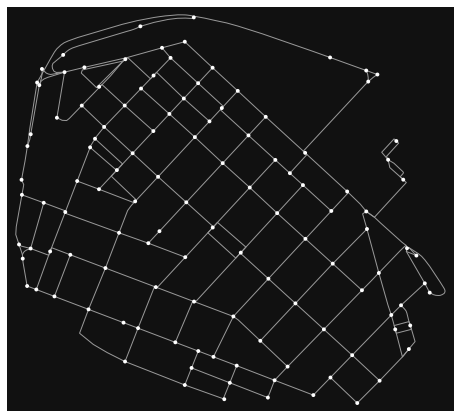

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
ox.plot_graph(G1)

## Agora basta separar os vértices e as arestas do grafo G1:

In [5]:
nodes, edges = ox.graph_to_gdfs(G1)

In [6]:
nodes

,y,x,osmid,lon,lat,geometry
0,-2.603585e+06,319966.874855,5313978968,-46.763542,-23.532579,POINT (319966.875 -2603584.595)
1,-2.603573e+06,319555.496966,"[1748138093, 2137755103]",NaN,NaN,POINT (319555.497 -2603572.762)
2,-2.603568e+06,319690.371650,2442585596,-46.766247,-23.532396,POINT (319690.372 -2603567.750)
3,-2.603560e+06,319831.065196,1657886459,-46.764869,-23.532343,POINT (319831.065 -2603560.071)
4,-2.603456e+06,319248.462779,1657874433,-46.770561,-23.531340,POINT (319248.463 -2603456.246)
...,...,...,...,...,...,...
114,-2.602992e+06,319994.784493,"[1657874342, 2137762520, 5695543267, 5695543268]",NaN,NaN,POINT (319994.784 -2602991.862)
115,-2.602940e+06,318929.471335,5678476990,-46.773622,-23.526648,POINT (318929.471 -2602940.442)
116,-2.602930e+06,319935.702802,"[1657886416, 7999481382]",NaN,NaN,POINT (319935.703 -2602930.088)
82-0,-2.602593e+06,318976.457789,145199313,-46.773120,-23.523517,POINT (318976.458 -2602593.060)


In [7]:
edges

,osmid,oneway,name,highway,length,geometry,u_original,v_original,from,to,service,lanes,maxspeed,width,bridge,u,v,key
0,203780803,False,Rua Abílio Mendes,tertiary,97.841000,"LINESTRING (320036.011 -2603515.517, 319966.87...",656260177,5313978968,11,0,NaN,NaN,NaN,NaN,NaN,0,11,0
1,550165184,False,Viela Narciso Gonçalves,service,114.594000,"LINESTRING (319883.970 -2603505.668, 319966.87...",5313978967,5313978968,14,0,alley,NaN,NaN,NaN,NaN,0,14,0
2,203780627,False,Rua Brás Baltazar,residential,56.656120,"LINESTRING (319572.641 -2603521.972, 319552.49...",2442585595,2137755103,12,1,NaN,NaN,NaN,NaN,NaN,1,12,0
3,223329577,False,Rua Zuma de Sá Fernandes,residential,129.840029,"LINESTRING (319433.345 -2603528.784, 319552.49...",2137755101,2137755103,10,1,NaN,NaN,NaN,NaN,NaN,1,10,0
4,203780625,False,Rua Antão de Souza Moura,service,126.209000,"LINESTRING (319572.641 -2603521.972, 319690.37...",2442585595,2442585596,12,2,alley,1,20,NaN,NaN,2,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,151253420,True,NaN,secondary_link,76.286000,"LINESTRING (319061.299 -2602560.910, 319018.26...",656253975,6096022287,105,108,NaN,NaN,NaN,NaN,NaN,105,108,0
191,151250466,True,NaN,secondary_link,91.764000,"LINESTRING (318983.278 -2602601.172, 318989.07...",1640700927,656253975,82-1,105,NaN,2,60,NaN,NaN,105,82-1,0
192,649604484,True,NaN,secondary_link,51.486000,"LINESTRING (318983.278 -2602601.172, 318989.45...",1640700927,6096022287,82-1,108,NaN,NaN,NaN,NaN,NaN,108,82-1,0
193,595933793,False,NaN,footway,71.756000,"LINESTRING (318929.471 -2602940.442, 318996.93...",5678476990,5678476991,115,111,NaN,NaN,NaN,NaN,NaN,111,115,0


***

## A biblioteca implementada durante o curso será importada abaixo:

In [8]:
from graphclasses import Graph

## Agora será gerado um grafo G, gerado pela biblioteca implementada no curso, com a lista de nós presente no grafo G1:

In [9]:
G = Graph(list(G1.nodes()))

## Geraremos todas as arestas a partir dos dados do grafo G1. As arestas terão peso peseado na distancia entre cada esquina do bairro:

In [10]:
for x in G1:
    for y in G1[x]:
        for w in G1[x][y]:
            for z in G1[x][y][w]:
                G.add_edge(x, y, G1[x][y][w]['length'])
   

## A quantidade de vértices gerada:

In [11]:
G.vertex_count

118

## E quantidade de arestas gerada:

In [12]:
G.edge_count

195

## A representação em lista de adjacência do grafo G é:

In [13]:
G.print()

0: {11: [97.841], 14: [114.594]}
1: {12: [56.656119694692386], 10: [129.84002900444867]}
2: {12: [126.209], 13: [57.635]}
3: {14: [75.976], 13: [128.26]}
4: {18: [111.206], 10: [198.435], 26: [245.679]}
5: {11: [133.3504013203977], 44: [119.23964182890109], 42: [82.21416803025917]}
6: {9: [76.775], 16: [50.303], 45: [139.681]}
7: {12: [126.859], 16: [56.351], 10: [57.012]}
8: {17: [161.075], 13: [58.472], 20: [116.288]}
9: {6: [76.775], 13: [125.551], 12: [57.339]}
10: {1: [129.84002900444867], 4: [198.435], 7: [57.012]}
11: {0: [97.841], 5: [133.3504013203977], 15: [116.024]}
12: {1: [56.656119694692386], 2: [126.209], 7: [126.859], 9: [57.339]}
13: {2: [57.635], 3: [128.26], 8: [58.472], 9: [125.551]}
14: {0: [114.594], 3: [75.976], 15: [96.522]}
15: {11: [116.024], 14: [96.522], 46: [173.669], 17: [118.63499999999999]}
16: {6: [50.303], 7: [56.351], 19: [75.899]}
17: {8: [161.075], 15: [118.63499999999999], 28: [119.318], 22: [169.008]}
18: {4: [111.206], 19: [123.274], 43: [47.988]

## Cada esquina é definida por um vértice, e é possível visualizar a localização de cada vértice graficamente:

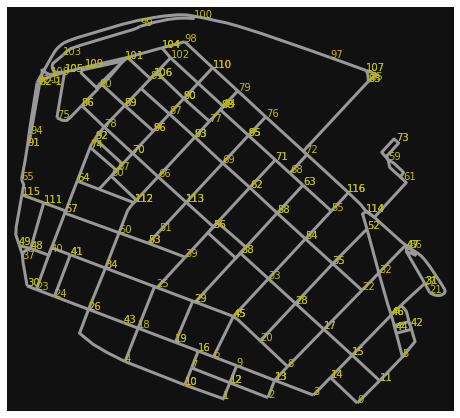

In [14]:
fig, ax = ox.plot_graph(G1, edge_linewidth=3, node_size=0, show=False, close=False)
xy = set()
for _, edge in ox.graph_to_gdfs(G1, nodes=False).fillna('').iterrows():
    text = f"{edge['from']}"
    xy.add(edge['from'])
    c = edge['geometry']
    c = str(c).split()
    x = float(c[1].split('(')[1])
    y = float(c[2].split(',')[0])
    ax.annotate(text, (x, y), c='y')
for _, edge in ox.graph_to_gdfs(G1, nodes=False).fillna('').iterrows():
    text = f"{edge['to']}"
    node = edge['to']
    if node not in xy:
        xy.add(node)
        c = edge['geometry']
        c = str(c).split()
        x = float(c[3])
        try:
            y = float(c[4].split(')')[0])
        except:
            y = float(c[4].split(',')[0])
        ax.annotate(text, (x, y), c='y')
plt.show()

## É possível saber se existe um caminho entre as esquinas 22 e 50:

In [18]:
G.has_path(22,50)

True

## E, caso exista, encontrar a menor distância entre as esquinas 22 e 50:

In [25]:
if G.has_path(22,50):
    djikstra = G.dijsktra(22,50)
print(djikstra[1])

983.0489485642357


## Sendo que o caminho entre 22 e 50 é:

In [38]:
djikstra[0]

[22, 35, 54, 58, 62, 56, 39, 53, 50]

## O bairro não forma um grafo Euleriano:

In [27]:
G.is_eulerian()

False

## Mas é conectado. Ou seja, a partir de qualquer esquina é possível chegar em outra.

In [39]:
G.is_connected()

True